In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
DATA_SUMMARY_PATH = '../data/raw/dataset_summary.json'

# Set plotting style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

with open(DATA_SUMMARY_PATH, 'r') as f:
    summary = json.load(f)

train_summary = summary['train']
print(f"Train dataset has {train_summary['shape']['rows']:,} rows and {train_summary['shape']['columns']} columns.")

# Analyse the Target Variable: IncidentGrade
incident_grade_stats = train_summary['columns']['IncidentGrade']['top_values']
grade_counts = pd.Series(incident_grade_stats)

print("\nDistribution of Incident Grades:")
print(grade_counts)


Train dataset has 9,516,837 rows and 45 columns.

Distribution of Incident Grades:
BenignPositive    4110817
TruePositive      3322713
FalsePositive     2031967
dtype: int64


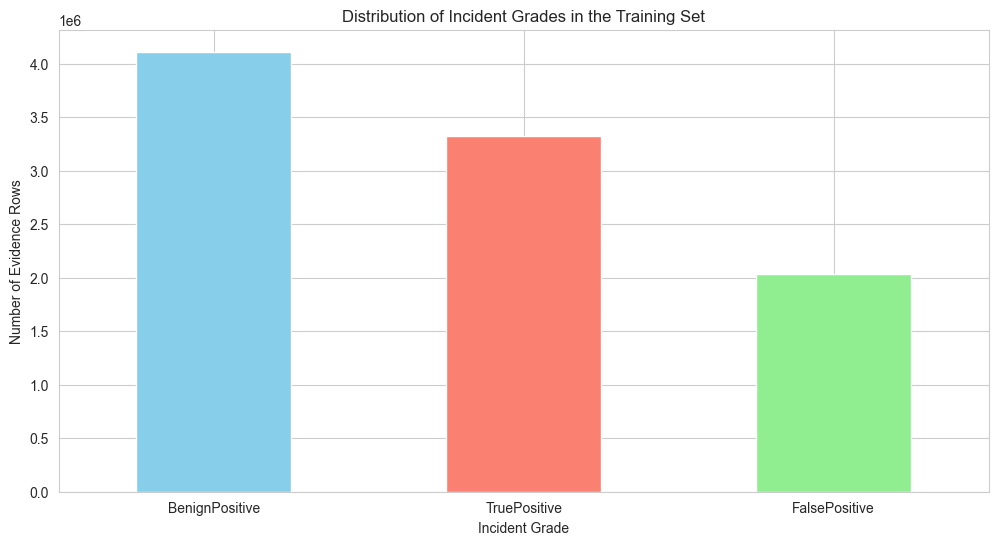

In [ ]:
# Visualise the Target Distribution
grade_counts.plot(kind='bar', color=['skyblue', 'salmon', 'lightgreen'])
plt.title('Distribution of Incident Grades in the Training Set')
plt.ylabel('Number of Evidence Rows')
plt.xlabel('Incident Grade')
plt.xticks(rotation=0)
plt.show()


In [8]:
import polars as pl

TRAIN_CSV_PATH = '../data/raw/GUIDE_Train.parquet'
lazy_df = pl.scan_parquet(TRAIN_CSV_PATH)

incident_level_counts = (
    lazy_df.select(['IncidentId', 'IncidentGrade']).drop_nulls().unique(subset=['IncidentId', 'IncidentGrade']).group_by('IncidentGrade').agg(pl.len().alias('incident_count')).sort('IncidentGrade').collect()
)

print("True Incident Level Analysis")
print(f"Total number of unique incidents: {incident_level_counts['incident_count'].sum():,}")
print("\nDistribution of Incident Grades at the INCIDENT level:")
print(incident_level_counts)

True Incident Level Analysis
Total number of unique incidents: 567,609

Distribution of Incident Grades at the INCIDENT level:
shape: (3, 2)
┌────────────────┬────────────────┐
│ IncidentGrade  ┆ incident_count │
│ ---            ┆ ---            │
│ str            ┆ u32            │
╞════════════════╪════════════════╡
│ BenignPositive ┆ 260495         │
│ FalsePositive  ┆ 177771         │
│ TruePositive   ┆ 129343         │
└────────────────┴────────────────┘


C:\Users\bharg\AppData\Local\Temp\ipykernel_19372\381940840.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


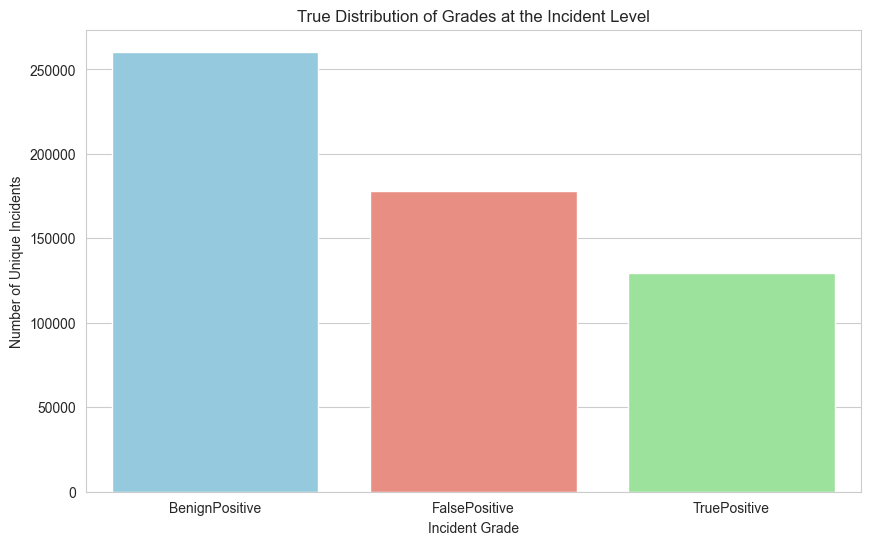

In [9]:
incident_level_counts_pd = incident_level_counts.to_pandas()

plt.figure(figsize=(10, 6))
sns.barplot(
    data=incident_level_counts_pd,
    x='IncidentGrade',
    y='incident_count',
    palette=['skyblue', 'salmon', 'lightgreen']
)
plt.title('True Distribution of Grades at the Incident Level')
plt.ylabel('Number of Unique Incidents')
plt.xlabel('Incident Grade')
plt.show()